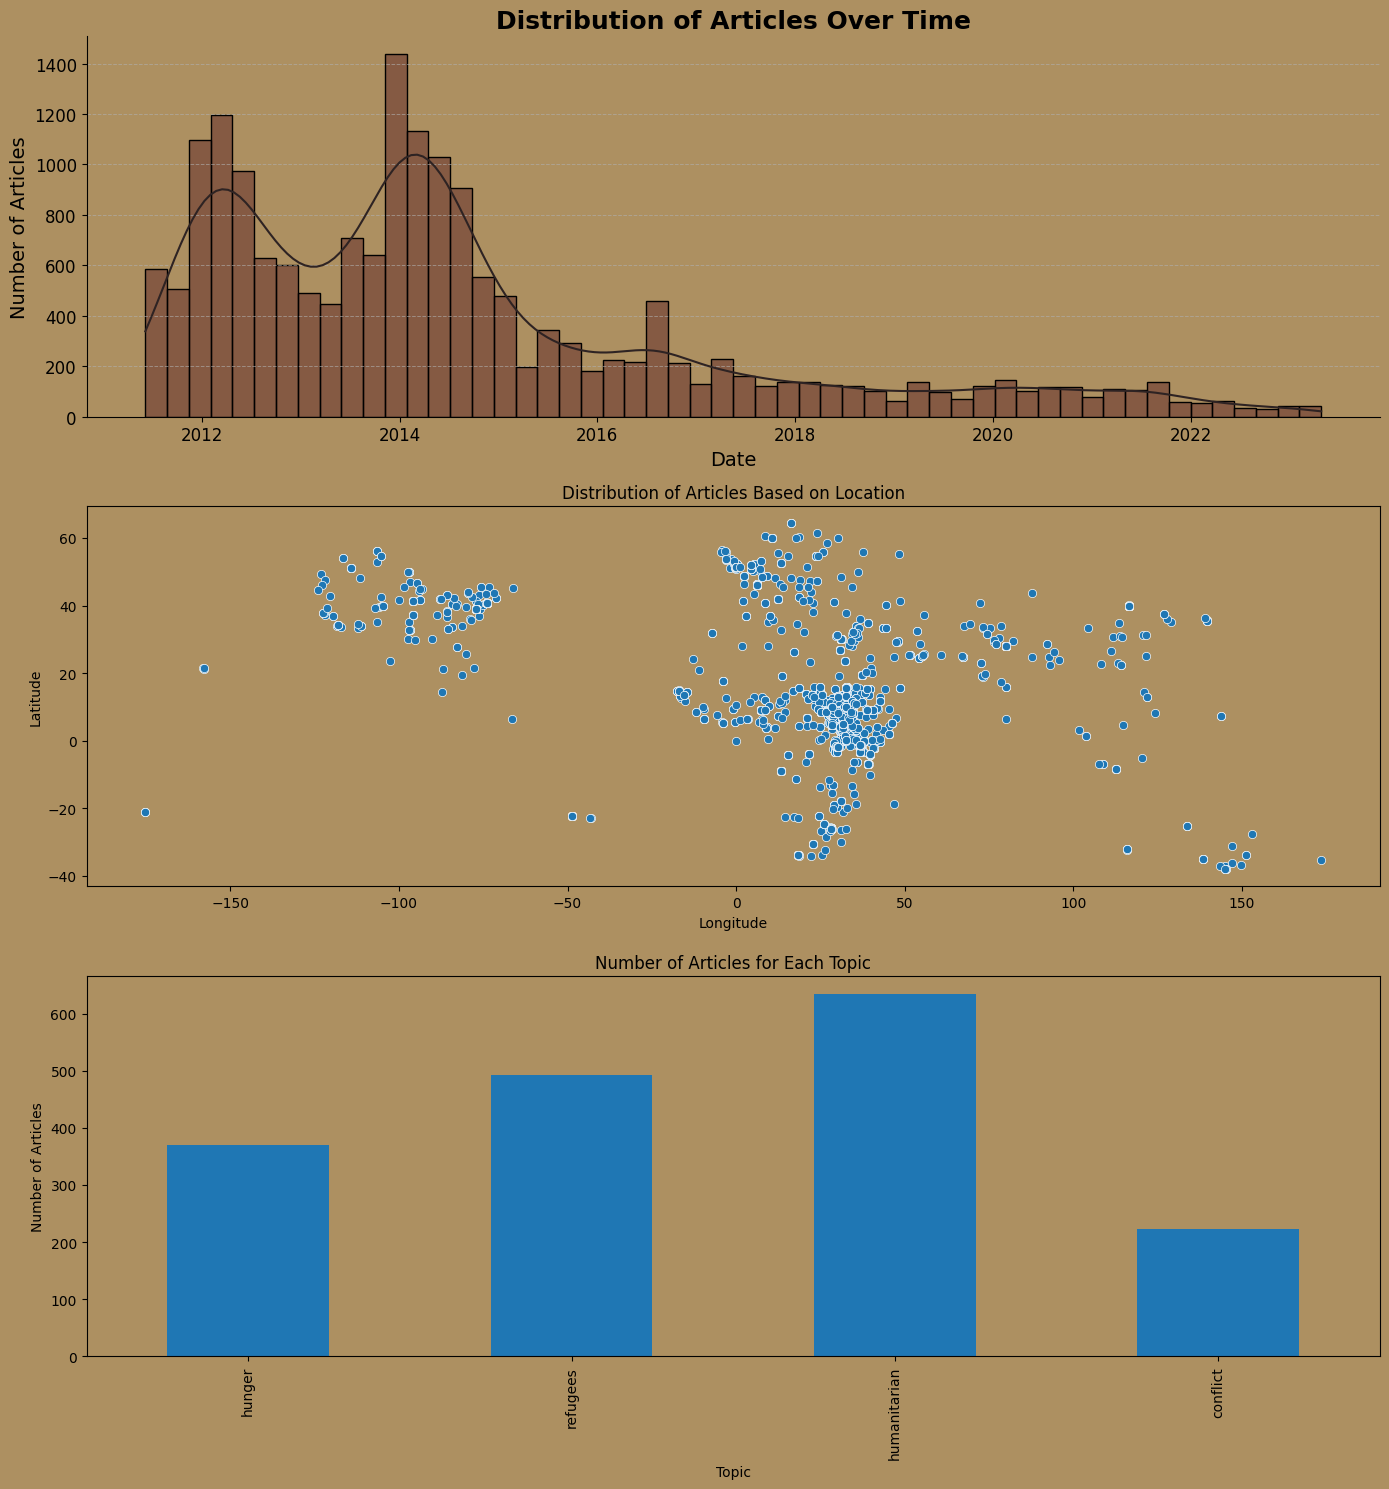

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("data/articles_topics.csv")
brown_palette = sns.dark_palette("brown")
# Convert the 'date' column to datetime format for easier plotting
data['date'] = pd.to_datetime(data['date'])

# Set up the plots
fig, ax = plt.subplots(3, 1, figsize=(14, 15))

# Plot distribution of articles over time
palette = sns.dark_palette("brown")
bar_color = palette[2]
kde_color = palette[0]
ax[0].set_facecolor('#ad9061')
ax[1].set_facecolor('#ad9061')
ax[2].set_facecolor('#ad9061')

# Plot the histogram
sns.histplot(data=data, x='date', ax=ax[0], color=bar_color, kde=True)
ax[0].lines[0].set_color(kde_color)  # Set the KDE color
ax[0].set_title("Distribution of Articles Over Time", fontsize=18, fontweight='bold')
ax[0].set_xlabel("Date", fontsize=14)
ax[0].set_ylabel("Number of Articles", fontsize=14)

# Enhance tick labels and hide top/right spines
ax[0].tick_params(axis='both', labelsize=12)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Grid settings
ax[0].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
# Plot distribution of articles based on location
sns.scatterplot(data=data, x='lng', y='lat', ax=ax[1])
ax[1].set_title("Distribution of Articles Based on Location")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")

# Plot distribution of articles for each topic
topics = ['hunger', 'refugees', 'humanitarian', 'conflict']
data_topics = data[topics].sum()
data_topics.plot(kind='bar', ax=ax[2])
ax[2].set_title("Number of Articles for Each Topic")
ax[2].set_xlabel("Topic")
ax[2].set_ylabel("Number of Articles")

plt.tight_layout()
plt.show()


In [3]:
# 1. Descriptive Statistics

# Continuous variables
continuous_stats = data[['lat', 'lng']].describe()

# Categorical variables
topic_freq = data[topics].sum()
topic_percent = (data[topics].mean() * 100)

# 2. Time Series Analysis
# Resample data by month and count the number of articles
monthly_data = data.resample('M', on='date').size()

# 3. Location-based Analysis: We'll visualize this using a heatmap later

# 4. Topic Analysis
# Correlation between topics
topic_corr = data[topics].corr()

# 5. Text Analysis: We'll visualize frequent terms from the 'summary' column later

continuous_stats, topic_freq, topic_percent, monthly_data, topic_corr


(                lat           lng
 count  18520.000000  18520.000000
 mean       8.874658     28.556556
 std       10.606173     24.525049
 min      -37.988580   -175.198242
 25%        4.859363     31.306979
 50%        6.800169     31.571250
 75%        9.231487     32.559899
 max       64.257715    173.507020,
 hunger          370
 refugees        493
 humanitarian    634
 conflict        223
 dtype: int64,
 hunger          1.997840
 refugees        2.661987
 humanitarian    3.423326
 conflict        1.204104
 dtype: float64,
 date
 2011-06-30     26
 2011-07-31    383
 2011-08-31    215
 2011-09-30    178
 2011-10-31    189
              ... 
 2022-12-31     19
 2023-01-31     13
 2023-02-28     22
 2023-03-31     16
 2023-04-30     14
 Freq: M, Length: 143, dtype: int64,
                 hunger  refugees  humanitarian  conflict
 hunger        1.000000 -0.023612      0.030420 -0.015762
 refugees     -0.023612  1.000000      0.459588 -0.018257
 humanitarian  0.030420  0.459588     

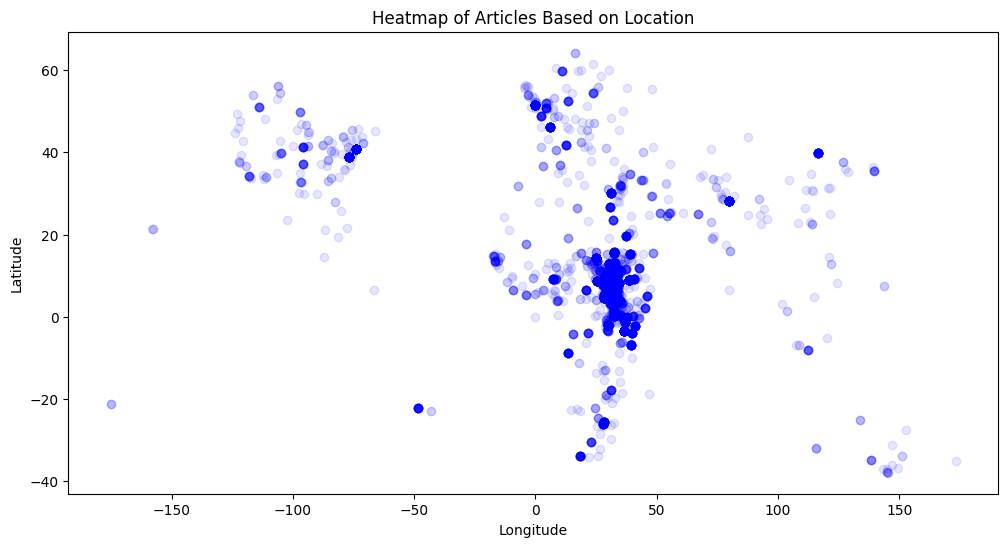

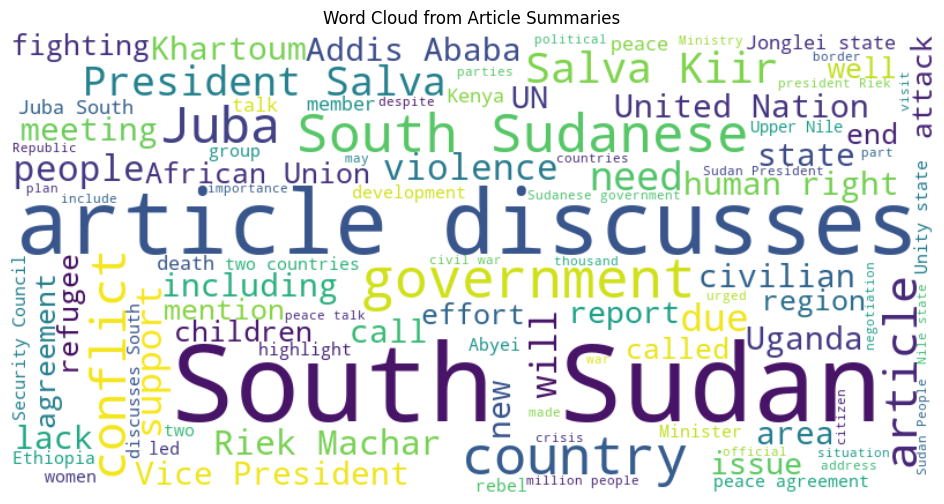

In [6]:
from wordcloud import WordCloud

# 3. Location-based Analysis: Heatmap based on article density
plt.figure(figsize=(12, 6))
plt.scatter(data['lng'], data['lat'], c='blue', alpha=0.1)
plt.title('Heatmap of Articles Based on Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 5. Text Analysis: Word cloud from the 'summary' column
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(data['summary']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Article Summaries')
plt.show()


In [7]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

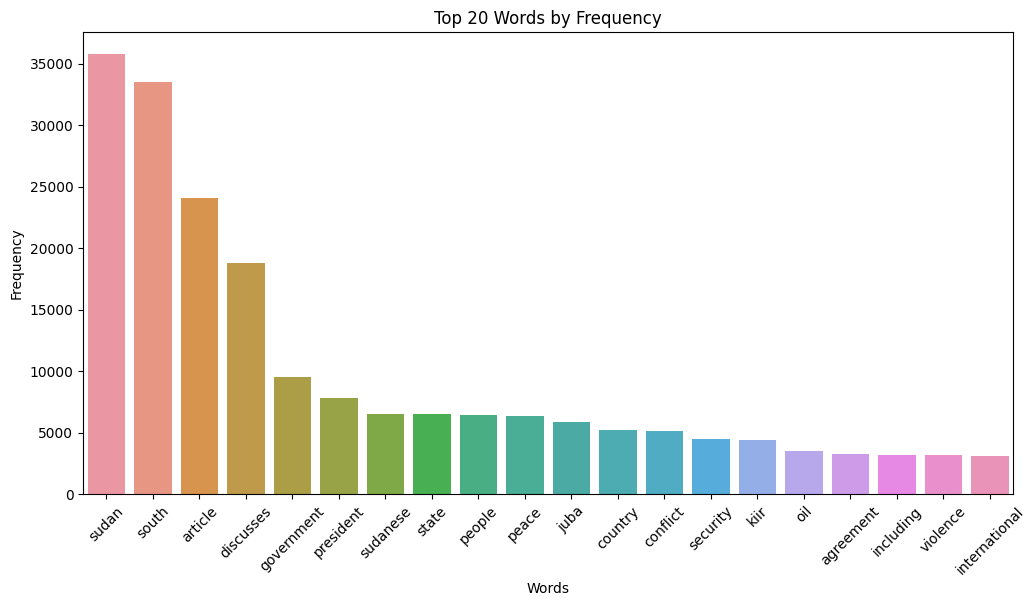

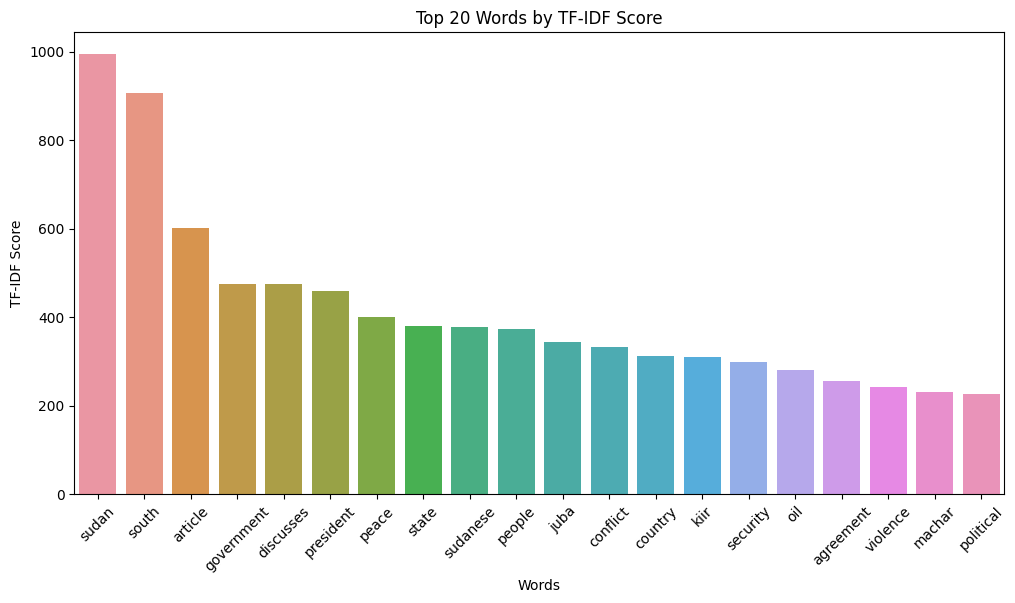

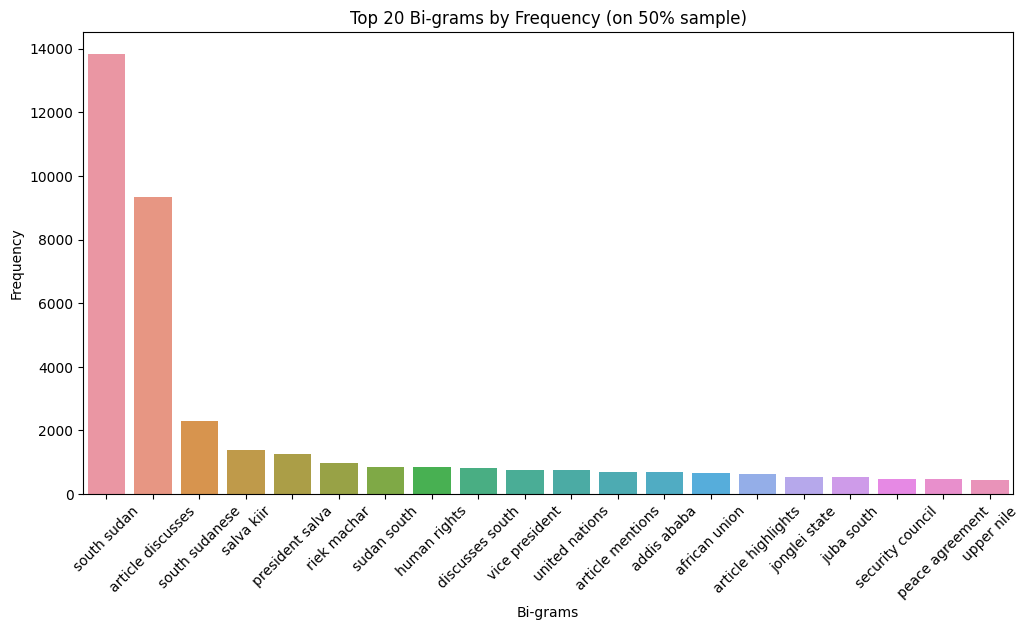

,frequency
south sudan,13832
article discusses,9343
south sudanese,2285
salva kiir,1399
president salva,1244
riek machar,963
sudan south,842
human rights,841
discusses south,812
vice president,764


In [11]:
word_vectorizer = CountVectorizer(analyzer='word', stop_words='english')
sparse_matrix = word_vectorizer.fit_transform(data['summary'])
frequencies = sum(sparse_matrix).toarray()[0]
term_freq = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by='frequency', ascending=False).head(20)

tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['summary'])
sum_tfidf = tfidf_matrix.sum(axis=0)
tfidf_scores = [(word, sum_tfidf[0, idx]) for word, idx in tfidf_vectorizer.vocabulary_.items()]
tfidf_df = pd.DataFrame(tfidf_scores, columns=['word', 'tfidf']).sort_values(by='tfidf', ascending=False).head(20)

bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = bigram_vectorizer.fit_transform(data['summary'])
bigram_frequencies = sum(bigram_matrix).toarray()[0]
bigram_freq = pd.DataFrame(bigram_frequencies, index=bigram_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by='frequency', ascending=False).head(20)

# 1. Term Frequency Analysis: Visualizing top words
plt.figure(figsize=(12, 6))
sns.barplot(x=term_freq.index, y=term_freq['frequency'])
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# 2. TF-IDF Analysis: Visualizing top words by TF-IDF score
plt.figure(figsize=(12, 6))
sns.barplot(x=tfidf_df['word'], y=tfidf_df['tfidf'])
plt.title('Top 20 Words by TF-IDF Score')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.show()

# 3. N-gram Analysis: We'll recompute with a smaller sample for efficiency and then visualize
sample_data = data.sample(frac=0.5, random_state=42)
bigram_matrix_sample = bigram_vectorizer.fit_transform(sample_data['summary'])
bigram_frequencies_sample = sum(bigram_matrix_sample).toarray()[0]
bigram_freq_sample = pd.DataFrame(bigram_frequencies_sample, index=bigram_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_freq_sample.index, y=bigram_freq_sample['frequency'])
plt.title('Top 20 Bi-grams by Frequency (on 50% sample)')
plt.xticks(rotation=45)
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.show()

bigram_freq_sample
